In [84]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [85]:
ball_by_ball = pd.read_csv("../shared/ipl/data/ball_by_ball.csv")
ball_by_ball.head()

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,...,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
0,598028,15,6,1,5,2,6.0,No Extras,4,0,...,-1,-1,20343,82,-1,4,1,0,0,20130420
1,598028,14,1,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420
2,598028,14,2,1,5,2,3.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420
3,598028,14,3,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420
4,598028,14,4,1,5,2,3.0,No Extras,0,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420


In [86]:
matches = pd.read_csv("../shared/ipl/data/matches.csv")
matches.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1


In [87]:
player_list = pd.read_csv("../shared/ipl/data/player_list.csv")
player_list.head()

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,7/8/1972,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
3,3,4,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan


In [88]:
player_match_list = pd.read_csv("../shared/ipl/data/player_match_list.csv")
player_match_list.head()

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,-1,-1.000000e+00,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12694,3.359870e+10,335987,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,...,2008.0,0.0,35.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12695,3.359870e+10,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,...,2008.0,0.0,30.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12696,3.359870e+10,335987,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India,Player,...,2008.0,0.0,20.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12697,3.359870e+10,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,2008.0,0.0,33.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha


In [89]:
teams = pd.read_csv("../shared/ipl/data/teams.csv")
teams.head(10)

,Team_SK,Team_Id,Team_Name
0,0,1,Kolkata Knight Riders
1,1,2,Royal Challengers Bangalore
2,2,3,Chennai Super Kings
3,3,4,Kings XI Punjab
4,4,5,Rajasthan Royals
5,5,6,Delhi Daredevils
6,6,7,Mumbai Indians
7,7,8,Deccan Chargers
8,8,9,Kochi Tuskers Kerala
9,9,10,Pune Warriors


# a. Venue-wise analysis - The average 1st innings and 2nd innings score across all venues

In [90]:
innings_score = ball_by_ball[['MatcH_id', 'Innings_No', 'Runs_Scored']]
match_vanue = matches[['match_id', 'Venue_Name']]
venue_inning_score = innings_score.set_index('MatcH_id').join(match_vanue.set_index('match_id'))
venue_inning_score['match_id'] = venue_inning_score.index

In [91]:
venue_inning_score['Innings_No'].unique()

array([1, 2, 3, 4])

In [10]:
venue_first_inning_score = venue_inning_score.loc[venue_inning_score.Innings_No == 1].groupby('Venue_Name')[['Runs_Scored']].sum()
venue_second_inning_score = venue_inning_score.loc[venue_inning_score.Innings_No == 2].groupby('Venue_Name')[['Runs_Scored']].sum()

In [92]:
venue_first_match_count = venue_inning_score[venue_inning_score.Innings_No == 1].groupby('Venue_Name'
                                                                                        )[['match_id']].nunique()

venue_second_match_count = venue_inning_score[venue_inning_score.Innings_No == 2].groupby('Venue_Name'
                                                                                        )[['match_id']].nunique()

In [93]:
venue_first_inning_score['match_count'] = venue_first_match_count['match_id']
venue_second_inning_score['match_count'] = venue_second_match_count['match_id']

In [94]:
venue_first_inning_score['average_score'] = venue_first_inning_score['Runs_Scored']*1.0/venue_first_inning_score['match_count']

venue_second_inning_score['average_score'] = venue_second_inning_score['Runs_Scored']*1.0/venue_second_inning_score['match_count']


In [95]:
venue_average_scores = venue_first_inning_score[['average_score']].join(venue_second_inning_score[['average_score']], lsuffix='_first_innning', rsuffix='_second_inning')


In [96]:
venue_average_scores

,average_score_first_innning,average_score_second_inning
Venue_Name,,
Barabati Stadium,162.285714,151.285714
Brabourne Stadium,168.272727,158.545455
Buffalo Park,135.333333,112.000000
De Beers Diamond Oval,152.666667,133.333333
Dr DY Patil Sports Academy,136.764706,127.352941
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,152.000000,120.272727
Dubai International Cricket Stadium,138.428571,139.000000
Eden Gardens,145.786885,134.622951
Feroz Shah Kotla,153.466667,140.389831


# b. Effect of Toss and home-field advantage on win

In [97]:
matches['Outcome_Type'].unique()

array(['Result', 'Superover', 'No Result', 'abandoned', 'tied'],
      dtype=object)

In [98]:
matches_result = matches.loc[matches.Outcome_Type.isin(['Result', 'Superover'])]

In [99]:
matches_result.shape

(632, 17)

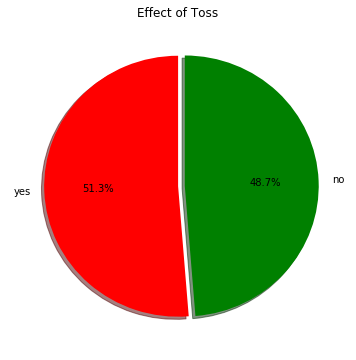

In [100]:
matches_toss_winner = matches[matches['Toss_Winner']==matches['match_winner']]
slices=[len(matches_toss_winner),(632-len(matches_toss_winner))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Effect of Toss')
plt.show()

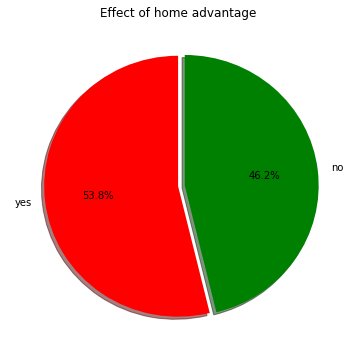

In [101]:
matches_home_team_winner = matches[matches['Team1']==matches['match_winner']]
slices=[len(matches_home_team_winner),(632-len(matches_home_team_winner))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Effect of home advantage')
plt.show()

# c. Clustering of matches: Based on balls used/ wickets lost/ runs scored by the two teams, can you categorize matches?

# d. Find the top-5 run-scorers and wicket-takers across all IPL seasons

In [103]:
ball_by_ball.columns

Index([u'MatcH_id', u'Over_id', u'Ball_id', u'Innings_No', u'Team_Batting',
       u'Team_Bowling', u'Striker_Batting_Position', u'Extra_Type',
       u'Runs_Scored', u'Extra_runs', u'Wides', u'Legbyes', u'Byes',
       u'Noballs', u'Penalty', u'Bowler_Extras', u'Out_type', u'Caught',
       u'Bowled', u'Run_out', u'LBW', u'Retired_hurt', u'Stumped',
       u'caught_and_bowled', u'hit_wicket', u'ObstructingFeild',
       u'Bowler_Wicket', u'Match_Date', u'Season', u'Striker', u'Non_Striker',
       u'Bowler', u'Player_Out', u'Fielders', u'Striker_match_SK',
       u'StrikerSK', u'NonStriker_match_SK', u'NONStriker_SK',
       u'Fielder_match_SK', u'Fielder_SK', u'Bowler_match_SK', u'BOWLER_SK',
       u'PlayerOut_match_SK', u'BattingTeam_SK', u'BowlingTeam_SK',
       u'Keeper_Catch', u'Player_out_sk', u'MatchDateSK'],
      dtype='object')

<b> Top 5 Players with max score

In [104]:
player_run_scores = ball_by_ball.groupby('Striker', as_index=False)[['Runs_Scored']].sum()

In [105]:
player_run_scores.head(5)

,Striker,Runs_Scored
0,1,1349
1,2,2755
2,3,91
3,4,1322
4,5,64


In [106]:
player_list.head(5)

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,7/8/1972,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
3,3,4,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan


In [107]:
player_runs = pd.merge(player_run_scores, player_list, left_on='Striker', right_on='Player_Id', how='inner').sort_values('Runs_Scored', ascending=False)
player_runs = player_runs[:5]


* <b> Top 5 Players with max score

In [108]:
player_runs[['Player_Name', 'Runs_Scored']].head()

,Player_Name,Runs_Scored
20,SK Raina,4548
7,V Kohli,4413
56,RG Sharma,4207
39,G Gambhir,4132
186,DA Warner,4014


* <b> Top 5 Bowlers with max wickets

In [109]:
bowler_wickets_taken = ball_by_ball.groupby('Bowler', as_index=False)[['Bowler_Wicket']].sum()

In [110]:
bowler_wickets_taken.head(5)

,Bowler,Bowler_Wicket
0,1,10
1,4,8
2,5,2
3,8,4
4,9,65


In [111]:
bowler_wickets = pd.merge(bowler_wickets_taken, player_list, left_on='Bowler', right_on='Player_Id', how='inner').sort_values('Bowler_Wicket', ascending=False)
bowler_wickets = bowler_wickets[:5]

In [112]:
bowler_wickets[['Player_Name', 'Bowler_Wicket']]

,Player_Name,Bowler_Wicket
132,SL Malinga,154
87,A Mishra,134
29,Harbhajan Singh,127
41,PP Chawla,126
44,DJ Bravo,122


# e. Histogram of dismisal-types for Virat Kohli

In [113]:
kohli_data =  pd.merge(ball_by_ball, player_list[player_list.Player_Name == 'V Kohli'], left_on='Striker', right_on='Player_Id', how='inner').sort_values('Runs_Scored', ascending=False)

In [114]:
kohli_data.head(5)

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,...,Keeper_Catch,Player_out_sk,MatchDateSK,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
343,501273,16,6,1,2,3,3.0,No Extras,6,0,...,0,0,20110524,7,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India
3343,980974,19,6,2,2,12,1.0,No Extras,6,0,...,0,0,20160507,7,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India
2362,598073,4,6,1,2,3,1.0,No Extras,6,0,...,0,0,20130518,7,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India
2091,829812,6,5,2,2,11,2.0,No Extras,6,0,...,0,0,20150515,7,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India
3009,980926,11,5,1,2,6,3.0,No Extras,6,0,...,0,0,20160417,7,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India


In [115]:
kohli_dismissal_data = kohli_data.groupby(['Out_type'])[['Caught','Bowled', 'Run_out', 'LBW', 'Retired_hurt', 'Stumped','caught_and_bowled', 'hit_wicket', 'ObstructingFeild']].sum()
kohli_dismissal_data['dismissal_type'] = kohli_dismissal_data.sum(axis=1)


In [35]:
kohli_dismissal_data = kohli_dismissal_data.loc[kohli_dismissal_data.index != 'Not Applicable']

In [36]:
kohli_dismissal_data.head(10)['dismissal_type']

Out_type
Keeper Catch         14
bowled               24
caught               62
caught and bowled     2
lbw                   7
run out              14
stumped               3
Name: dismissal_type, dtype: int64

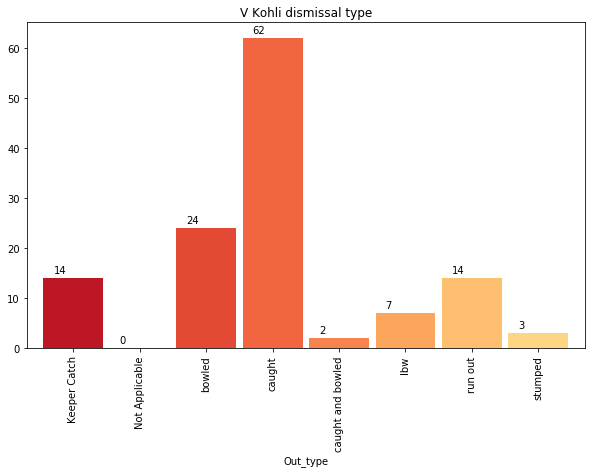

In [116]:
plt.subplots(figsize=(10,6))
ax=kohli_dismissal_data['dismissal_type'].plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('V Kohli dismissal type')
plt.show()

# Match win predictor

<b>Prepare Training Data

In [117]:
scores_df =  pd.merge(ball_by_ball, matches, left_on='MatcH_id', right_on='match_id', how='inner')

scores_df.columns

Index([u'MatcH_id', u'Over_id', u'Ball_id', u'Innings_No', u'Team_Batting',
       u'Team_Bowling', u'Striker_Batting_Position', u'Extra_Type',
       u'Runs_Scored', u'Extra_runs', u'Wides', u'Legbyes', u'Byes',
       u'Noballs', u'Penalty', u'Bowler_Extras', u'Out_type', u'Caught',
       u'Bowled', u'Run_out', u'LBW', u'Retired_hurt', u'Stumped',
       u'caught_and_bowled', u'hit_wicket', u'ObstructingFeild',
       u'Bowler_Wicket', u'Match_Date', u'Season', u'Striker', u'Non_Striker',
       u'Bowler', u'Player_Out', u'Fielders', u'Striker_match_SK',
       u'StrikerSK', u'NonStriker_match_SK', u'NONStriker_SK',
       u'Fielder_match_SK', u'Fielder_SK', u'Bowler_match_SK', u'BOWLER_SK',
       u'PlayerOut_match_SK', u'BattingTeam_SK', u'BowlingTeam_SK',
       u'Keeper_Catch', u'Player_out_sk', u'MatchDateSK', u'Match_SK',
       u'match_id', u'Team1', u'Team2', u'match_date', u'Season_Year',
       u'Venue_Name', u'City_Name', u'Country_Name', u'Toss_Winner',
       u'match_wi

In [118]:
scores_df=  scores_df.loc[scores_df.Outcome_Type.isin(['Result', 'tied'])]

In [119]:
# wicket on ball
def is_wicket(row):
    if row.Caught == 1 or row.Bowled == 1 or row.Run_out == 1 or row.LBW == 1 or row.Retired_hurt == 1 or row.Stumped == 1 or \
        row.caught_and_bowled == 1 or row.hit_wicket == 1 or row.ObstructingFeild ==1 :
             return 1
    return 0

In [120]:
# runs on ball
def get_runs(row):
    return row.Runs_Scored + row.Extra_runs + row.Wides + row.Legbyes + row.Byes + row.Noballs + row.Penalty + row.Bowler_Extras

In [121]:
def is_boundry(row):
    if row.Runs_Scored in [4, 6] or row.Extra_runs in [4, 6] or row.Legbyes in [4, 6] or row.Byes in [4, 6]:
        return 1
    return 0

In [122]:
scores_df['wicket'] = scores_df.apply(lambda row: is_wicket(row),axis=1)
scores_df['total_runs'] = scores_df.apply(lambda row: get_runs(row),axis=1)
scores_df['boundry'] = scores_df.apply(lambda row: is_boundry(row),axis=1)

In [123]:
# inning score
innings_df = scores_df.groupby(['MatcH_id', 'Innings_No'], as_index=False)[['total_runs']].sum().reset_index()

In [124]:
innings_df.sample(5)

,index,MatcH_id,Innings_No,total_runs
206,206,392234,1,147
828,828,733980,1,157
189,189,392225,2,120
909,909,829714,2,152
914,914,829720,1,200


In [125]:
# first innings score
first_innings_scores_df = innings_df[innings_df.Innings_No==1]

In [126]:
first_innings_scores_df.sample(5)

,index,MatcH_id,Innings_No,total_runs
1112,1112,981002,1,125
1184,1184,1082615,1,188
956,956,829766,1,192
732,732,598052,1,200
56,56,336015,1,136


In [127]:
train_df = scores_df.groupby(['MatcH_id', 'Innings_No', 'Over_id', 'Ball_id', 'Team1', 'Team2', 'Team_Batting', 'match_winner', 'Venue_Name', 'Toss_Winner', 'Toss_Name'], as_index=False).sum().reset_index()
train_df.columns = train_df.columns.get_level_values(0)

In [128]:
train_df.columns = train_df.columns.get_level_values(0)

In [129]:
#current_Score
train_df['current_score'] = train_df.groupby(['MatcH_id', 'Innings_No' ])['total_runs'].cumsum()

In [130]:
#current_Score
train_df['wicket_down'] = train_df.groupby(['MatcH_id', 'Innings_No' ])['wicket'].cumsum()

In [131]:
train_df.sample(5)

,index,MatcH_id,Innings_No,Over_id,Ball_id,Team1,Team2,Team_Batting,match_winner,Venue_Name,...,Match_SK,match_id,Season_Year,Win_Margin,Country_id,wicket,total_runs,boundry,current_score,wicket_down
8468,8468,336023,1,2,3,Mumbai Indians,Chennai Super Kings,3,Mumbai Indians,Wankhede Stadium,...,36,336023,2008,9.0,1,0,0,0,5,0
130534,130534,980988,2,10,4,Sunrisers Hyderabad,Delhi Daredevils,6,Delhi Daredevils,"Rajiv Gandhi International Stadium, Uppal",...,558,980988,2016,7.0,1,0,1,0,80,2
144970,144970,1082635,1,12,4,Delhi Daredevils,Mumbai Indians,Mumbai Indians,Mumbai Indians,Feroz Shah Kotla,...,621,1082635,2017,146.0,1,0,6,1,118,1
80659,80659,598025,1,12,2,Delhi Daredevils,Chennai Super Kings,3,Chennai Super Kings,Feroz Shah Kotla,...,344,598025,2013,86.0,1,0,6,1,84,1
10858,10858,336034,1,7,4,Chennai Super Kings,Royal Challengers Bangalore,2,Royal Challengers Bangalore,"MA Chidambaram Stadium, Chepauk",...,47,336034,2008,14.0,1,0,1,0,26,2


In [132]:
train_df['target_score'] = pd.merge(train_df, first_innings_scores_df, left_on='MatcH_id', right_on='MatcH_id', how='inner')['total_runs_y']



In [133]:
# target remaining
def get_target_remaining(row):
    if row['target_score'] == -1.:
        return -1
    else:
        return row['target_score'] - row['current_score']

In [134]:
# wicket down
def get_wicket_remaining(row):
    return 10 - row['wicket_down']

In [135]:
def get_bowls_bowled(row):
    return (row['Over_id']-1)*6 + row['Ball_id']


In [136]:
def get_bowls_remaining(row):
    balls_bowled = (row['Over_id']-1)*6 + row['Ball_id']
    if balls_bowled <= 120:
        return 120 - balls_bowled
    else:
        return 0

In [137]:
train_df['target_remaining'] = train_df.apply(lambda row: get_target_remaining(row),axis=1)
train_df['wicket_remaining'] = train_df.apply(lambda row: get_wicket_remaining(row),axis=1)
train_df['balls_bowled'] = train_df.apply(lambda row: get_bowls_bowled(row),axis=1)
train_df['balls_remaining'] = train_df.apply(lambda row: get_bowls_remaining(row),axis=1)

In [138]:
# team name from id
def get_team_name(row):
    try :
        team_name = teams.loc[teams.Team_Id == int(row.Team_Batting)]

        if team_name.shape[0]>0:
            return team_name.iloc[0]['Team_Name']
        else :
            return row.Team_Batting
    except Exception as ex:
        return row.Team_Batting
        

In [139]:
def is_chasing_team_won(row):
    if row.Innings_No == 2 and row.match_winner==row.team_batting_name:
        return 1
    return 0

In [140]:
train_df['team_batting_name'] = train_df.apply(lambda row: get_team_name(row),axis=1)

In [141]:
train_df['chasing_team_won'] = train_df.apply(lambda row: is_chasing_team_won(row),axis=1)

In [142]:
chasing_team_win_predictor_df = train_df.loc[train_df.Innings_No == 2].loc[train_df.balls_remaining<90].copy()

In [143]:
columns = ['current_score', 'target_score', 'target_remaining', 'wicket_remaining',  'balls_remaining']

norm_columns = ['current_score', 'target_score',  'target_remaining', 'wicket_remaining',
                'balls_remaining']

In [144]:
def norm_dataset(dataset):
    return dataset

In [145]:
chasing_team_win_predictor_train_df = chasing_team_win_predictor_df[[col for col in 
                                                                           columns]].copy()
chasing_team_win_predictor_input_dataset = norm_dataset(chasing_team_win_predictor_train_df)
chasing_team_win_predictor_labels = chasing_team_win_predictor_df[['chasing_team_won']]

In [146]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(chasing_team_win_predictor_input_dataset, 
                                                                                     chasing_team_win_predictor_labels, 
                                                                                     test_size=0.30)


print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(36446, 5)
(36446, 1)
(15620, 5)
(15620, 1)


In [147]:
train_data.sample(5)

,current_score,target_score,target_remaining,wicket_remaining,balls_remaining
99107,158,181,23,4,9
2086,141,226,85,7,39
88189,80,241,161,5,61
55347,105,141,36,8,43
96040,119,161,42,8,35


In [148]:
# ada boost
xgb = xgboost.XGBClassifier(max_depth=6, learning_rate=0.1,
                                       n_estimators=1200, silent=True,
                                       objective='binary:logistic',
                                       nthread=-1,
                                       gamma=0, min_child_weight=2,
                                       max_delta_step=0, subsample=0.8,
                                       colsample_bytree=0.8, colsample_bylevel=1,
                                       reg_alpha=0, reg_lambda=1,
                                       scale_pos_weight=1, base_score=0.5,
                                       seed=23, missing=None)
# fitting the model
xgb.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=2, missing=None, n_estimators=1200,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=23, silent=True,
       subsample=0.8)

In [180]:
# Model Validation

# predict the response

data_to_test = test_data 
known_test_labels = test_labels 

predicted_test_labels = xgb.predict(data_to_test)


print (accuracy_score(known_test_labels, predicted_test_labels))
print(classification_report(known_test_labels, predicted_test_labels))
print(confusion_matrix(known_test_labels, predicted_test_labels))

0.9223431498079385
             precision    recall  f1-score   support

          0       0.92      0.91      0.92      7459
          1       0.92      0.93      0.93      8161

avg / total       0.92      0.92      0.92     15620

[[6820  639]
 [ 574 7587]]


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [182]:
# predict on all data
chasing_team_win_predictor_test_df = chasing_team_win_predictor_df[[col for col in 
                                                                           columns]].copy()
chasing_team_win_predictor_test_dataset = norm_dataset(chasing_team_win_predictor_test_df)
pred_labels = xgb.predict(chasing_team_win_predictor_test_dataset)
pred_probs = xgb.predict_proba(chasing_team_win_predictor_test_dataset)

/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [183]:
# set prediction and winning probability
chasing_team_win_predictor_df['prediction'] = pred_labels
chasing_team_win_predictor_df['winning_probability'] = pred_probs[:, 1]

In [184]:
# select 10 matches
sample_matches = matches.sample(10)

In [185]:
output_df = pd.merge(chasing_team_win_predictor_df, sample_matches, left_on='MatcH_id', right_on='match_id', 
                                    how='inner')

In [186]:
# sample any 10 matches
output_df['MatcH_id'].unique()

array([392194, 392214, 392235, 419141, 501271, 548334, 548357, 548359,
       829710, 829740])

Text(0,0.5,'Winning Probabilty')

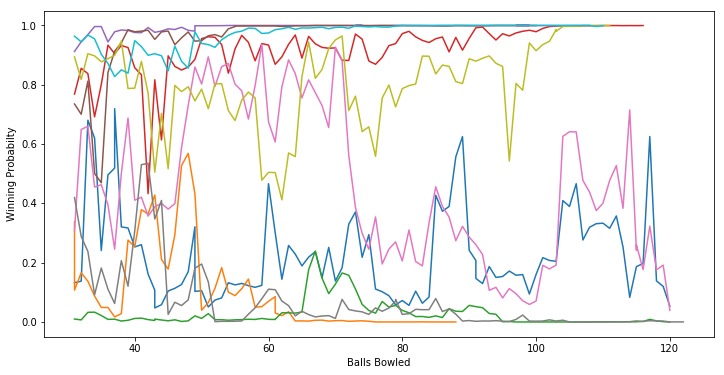

In [187]:
# plot winning probability of 10 matches.
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
for match_id in output_df['MatcH_id'].unique():
    match_output_df = output_df.loc[output_df.MatcH_id == match_id]
    ax.plot(match_output_df['balls_bowled'], match_output_df['winning_probability'])

ax.set_xlabel('Balls Bowled')
ax.set_ylabel('Winning Probabilty')
    

In [190]:
match_output_df = output_df.loc[output_df.MatcH_id == 392194]

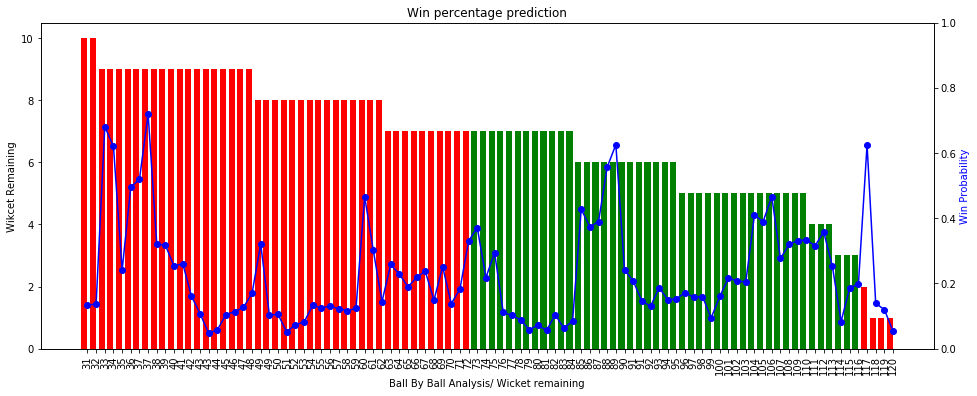

In [191]:
fig, ax1 = plt.subplots(figsize=(16,6))
ax2 = ax1.twinx()
labels = np.array(match_output_df['balls_bowled'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(match_output_df['wicket_remaining']), width=width, color=['red']*45 + ['green']*45)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Wikcet Remaining")
ax1.set_xlabel("Ball By Ball Analysis/ Wicket remaining")
ax1.set_title("Win percentage prediction")

ax2.plot(ind+0.35, np.array(match_output_df['winning_probability']), color='b', marker='o')
ax2.set_ylabel("Win Probability", color='b')
ax2.set_ylim([0,1])
ax2.grid(b=False)
plt.show()

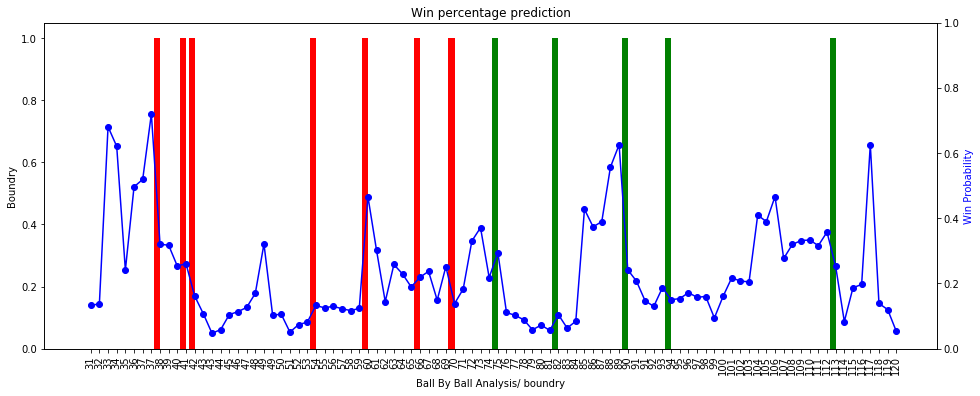

In [192]:
fig, ax1 = plt.subplots(figsize=(16,6))
ax2 = ax1.twinx()
labels = np.array(match_output_df['balls_bowled'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(match_output_df['boundry']), width=width, color=['red']*45 + ['green']*45)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Boundry")
ax1.set_xlabel("Ball By Ball Analysis/ boundry")
ax1.set_title("Win percentage prediction")

ax2.plot(ind+0.35, np.array(match_output_df['winning_probability']), color='b', marker='o')
ax2.set_ylabel("Win Probability", color='b')
ax2.set_ylim([0,1])
ax2.grid(b=False)
plt.show()

In [193]:
# WIN PREDICTOR MODEL 2
train_df.columns

Index([u'index', u'MatcH_id', u'Innings_No', u'Over_id', u'Ball_id', u'Team1',
       u'Team2', u'Team_Batting', u'match_winner', u'Venue_Name',
       u'Toss_Winner', u'Toss_Name', u'Striker_Batting_Position',
       u'Runs_Scored', u'Extra_runs', u'Wides', u'Legbyes', u'Byes',
       u'Noballs', u'Penalty', u'Bowler_Extras', u'Caught', u'Bowled',
       u'Run_out', u'LBW', u'Retired_hurt', u'Stumped', u'caught_and_bowled',
       u'hit_wicket', u'ObstructingFeild', u'Bowler_Wicket', u'Season',
       u'Striker', u'Non_Striker', u'Bowler', u'Player_Out', u'Fielders',
       u'Striker_match_SK', u'StrikerSK', u'NonStriker_match_SK',
       u'NONStriker_SK', u'Fielder_match_SK', u'Fielder_SK',
       u'Bowler_match_SK', u'BOWLER_SK', u'PlayerOut_match_SK',
       u'BattingTeam_SK', u'BowlingTeam_SK', u'Keeper_Catch', u'Player_out_sk',
       u'MatchDateSK', u'Match_SK', u'match_id', u'Season_Year', u'Win_Margin',
       u'Country_id', u'wicket', u'total_runs', u'boundry', u'current_scor

In [194]:
columns_1 = ['current_score', 'target_score', 'target_remaining', 'wicket_remaining',  'balls_remaining', 'Venue_Name','Toss_Name', 'chasing_team_won']



In [203]:
chasing_team_win_predictor_train_df_1 = chasing_team_win_predictor_df[[col for col in columns_1]].copy()

In [196]:
def norm_dataset(dataset):
    return dataset

In [204]:
chasing_team_win_predictor_train_df_1.sample()

,current_score,target_score,target_remaining,wicket_remaining,balls_remaining,Venue_Name,Toss_Name,chasing_team_won
1347,74,173,99,7,78,Sawai Mansingh Stadium,bat,1


In [205]:
var_mod = ['Toss_Name', 'Venue_Name']
le = LabelEncoder()
for i in var_mod:
    chasing_team_win_predictor_train_df_1[i] = le.fit_transform(chasing_team_win_predictor_train_df_1[i])

In [199]:
chasing_team_win_predictor_train_df_1.sample(5)

,current_score,target_score,target_remaining,wicket_remaining,balls_remaining,Venue_Name,Toss_Name,chasing_team_won
52866,78,123,45,9,66,23,2,1
124823,152,152,0,5,14,25,3,1
23356,96,156,60,5,40,13,2,0
148535,94,142,48,8,29,24,0,0
50274,61,166,105,9,66,36,3,0


In [206]:
#Import models from scikit learn module:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

In [208]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['chasing_team_won']
predictor_var = ['current_score','target_score','target_remaining', 'wicket_remaining', 'balls_remaining', 'Venue_Name', 'Toss_Name']
model = LogisticRegression()
classification_model(model, chasing_team_win_predictor_train_df_1,predictor_var,outcome_var)

/Library/Python/2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 79.695%
Cross-Validation Score : 79.303%
